# AirSonDo_incheon
 - 2019.01.02 01:00 부터 수집을 시작해서 모으는 DATA
 - 모으는데로 간단한 경향 분석을 볼수 있도록 작성
 
 - 환경공단에서 실시간 모으는 자료는 1시간 간격
 - 정리해서 배포하는 자료는 하루평균치로 계산해서 배포한다.
 - 장비 점검으로 인한 결측치는 '청라'의 데이터로 채워넣는다

In [1]:
"""
* 청라, 송도지역 미세먼지 측정값 스크래핑
"""
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from asset.config import *
from asset.simple_plot import *


# dir_work,
# dir_data,
# dir_data_collect,
# dir_data_trash,
# dir_img,
# dir_img_heatmap,
# dir_img_nulschool,
# dir_img_plot_plot,
# dir_img_plot_scatter,
# dir_img_test,


# df_plot



In [3]:
# 수집된 데이터의 가장 마지막 화일을 읽어온다.
# file_name  # df.TIMES.tail(1).tolist()[0]

file_name = os.listdir(dir_data_collect)[-1]    # ['_air_20190109_Wed_1700.csv']

df = pd.read_csv(dir_data_collect + f'/{file_name}')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 8 columns):
TIMES    191 non-null object
Time     191 non-null object
SO2      191 non-null float64
NO2      191 non-null float64
O3       191 non-null float64
CO       191 non-null float64
PM10     191 non-null int64
PM2.5    191 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.0+ KB


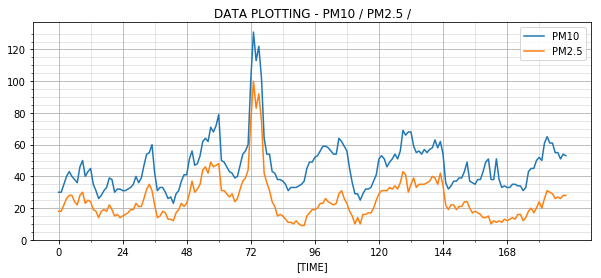

In [4]:
# 전체 플로트

df_plot(
    df_series_list=[
        df['PM10'], 
        df['PM2.5'],
    ],
    figsize=(10,4),
    xy_start=(0,0),
    xy_max=(
        df.index.size,
        np.max(df.PM10),
    ),
    xy_major=(24,20),
    xy_minor=(12,5),
)

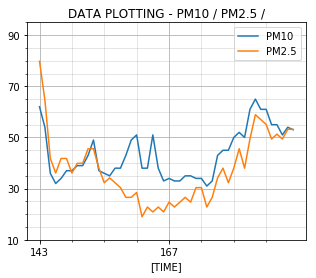

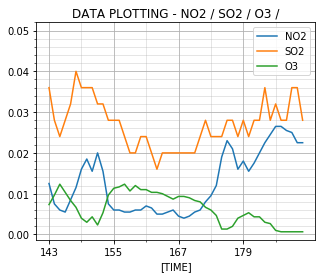

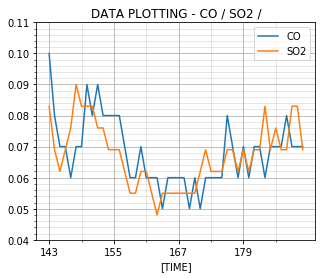

In [5]:
# 뒤에서 48시간 플로트

df_plot(
    figsize=(5,4),
    df_series_list=[
        df['PM10'].tail(48), 
        df['PM2.5'].tail(48)*1.9,
    ],
    xy_start=(
        len(df['PM10'])-48,
        10,
    ),
    xy_max=(
        df.index.size,
        np.max(df.PM10.tail(48))*1.5,
    ),
    xy_major=(24,20),
    xy_minor=(6,5),
)


# 뒤에서 48시간 플로트

df_plot(    
    figsize=(5,4),
    df_series_list=[
        df['NO2'].tail(48)/2, 
        df['SO2'].tail(48)*4,
        df['O3'].tail(48)/3,
    ],
    xy_start=(len(df['NO2'])-48,0),
    xy_max=(
        df.index.size,
        np.max(df.NO2.tail(48)),
    ),
    xy_major=(12,.01),
    xy_minor=(6,.002),
)

# 뒤에서 48시간 플로트

df_plot(    
    figsize=(5,4),
    df_series_list=[
        df['CO'].tail(48)/10,
        df['SO2'].tail(48)*7+0.02
    ],
    
    xy_start=(
        len(df['NO2'])-48,
        0.04,
    ),
    
    xy_max=(
        df.index.size,
        0.11,
    ),
    
    xy_major=(12,.01),
    xy_minor=(6,.002),
)

In [6]:
print(df.TIMES.tail(1).tolist()[0])
df.tail(3)

2019.01/09(Wed)-23:00


,TIMES,Time,SO2,NO2,O3,CO,PM10,PM2.5
188,2019.01/09(Wed)-21:00,2019-01-09 21:00:00,0.009,0.050,0.002,0.7,51,26.0
189,2019.01/09(Wed)-22:00,2019-01-09 22:00:00,0.009,0.045,0.002,0.7,54,28.0
190,2019.01/09(Wed)-23:00,2019-01-09 23:00:00,0.007,0.045,0.002,0.7,53,28.0


In [7]:
df48 = df.tail(48)

In [8]:
# 데이터간 연계성(Correlation) 확인 

chk_columns = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5',]
chk_dfs = pd.DataFrame(df48[col] for col in chk_columns)

chk_dfs.T.head(5)   # 방향을 transpose() 시켜줘야 함
chk_dfs.T.corr()

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.591334,-0.540801,0.622290,0.373073,0.699521
NO2,0.591334,1.000000,-0.942716,0.368574,0.647641,0.617495
O3,-0.540801,-0.942716,1.000000,-0.248211,-0.467868,-0.479947
CO,0.622290,0.368574,-0.248211,1.000000,0.294064,0.630368
PM10,0.373073,0.647641,-0.467868,0.294064,1.000000,0.745012
PM2.5,0.699521,0.617495,-0.479947,0.630368,0.745012,1.000000


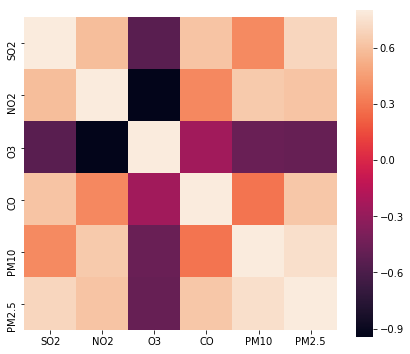

In [9]:
# Correlation Heatmap 확인 (양/음의 관계 강도를 이미지로 보여줌)
# sns.heatmap(chk_dfs.T.corr())

f, ax = plt.subplots(figsize=(7,6))
sns.heatmap(chk_dfs.T.corr(), vmax=.8, square=True)
# plt.savefig(dir_img_heatmap + f'/heatmap_{SAVE_LOG1}.png')